<a href="https://colab.research.google.com/github/VedantUB/IE643-Deep-Learning/blob/main/Perceptron_demo_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#import the required packages
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed(1000) #seed the random number generator for repeatability

Python modules required for plotting the data points and the hyperplane

In [16]:
def Plot_datapoints(p1,q1,p2,q2):
    plt.scatter(p1,q1)
    plt.scatter(p2,q2)
    # plt.grid(b = True, which = 'both')
    plt.xlabel("x coordinate")
    plt.ylabel("y coordinate")
    plt.title("Data")
    plt.show()

def Plot_Classifier_with_bias(data, w):
    x_points=[]
    for i in range(len(data)):
        x_points.append(data[i][0][0])
    maximum = max(x_points)
    minimum = min(x_points)
    points = []
    x_points = np.linspace(minimum,maximum,1000)
    for i in range(len(x_points)):
        points.append((-w[0]*x_points[i]-w[2])/w[1])

    plt.plot(x_points,points,color='black')

Python module used for perceptron's prediction rule

In [17]:
def prediction(w, x):
    #Write code to return a prediction of +1 or -1 according to the perceptron prediction rule
    return np.sign(np.dot(w,x))


Python module used for updating the weights of Perceptron

In [18]:
def update_weights(weight, y_label, x_feature, y_pred, misclass):
    #write code to update weight and add 1 to misclass if the perceptron misclassifies x_feature
    if y_pred == y_label:
      weight = weight
    else:
      weight = weight + np.dot(y_label, x_feature)
      misclass += 1


    return weight , misclass

Python module used for Perceptron training

In [19]:
def perceptron_training(data):
    w =np.random.randn(3)  # randomly generating w
    flag=0
    mistakes = 0
    epochs=0

    while flag==0 and epochs<50:   # until mistakes are not zero or number of epochs reach 50
        mistakes=0

        #we visualize the hyperplane each time to check for progress
        Plot_Classifier_with_bias(data, w)

        Plot_datapoints(x1,y1,x2,y2)

        for i in range(len(data)):
            x = data[i][0]
            x = np.concatenate((x,np.ones(1)),axis = 0)
            y_hat = prediction(w, x)

            y = data[i][1]

            w , mistakes= update_weights(w, y, x, y_hat, mistakes)

        epochs=epochs+1
        if mistakes==0:
            flag=1
    return w, mistakes

Data Creation and Visualization

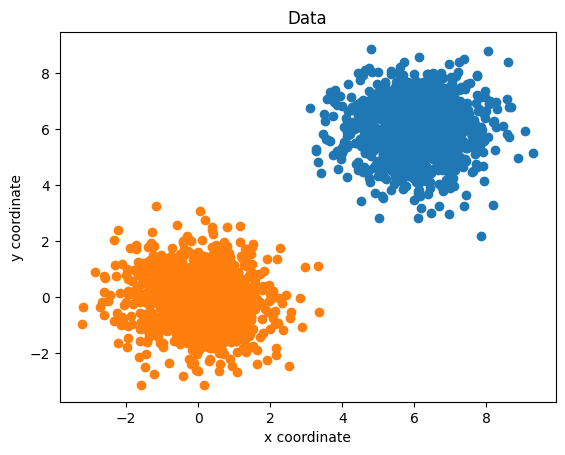

In [20]:
# Data creation, plot the data, and train perceptron
#Use your homework to create 1000 points from a two-dimensionsal normal distribution with mean [6 ,6] and variance [[1, 0], [0,1]]
#Assign the points to data1
data1 = np.random.multivariate_normal([6, 6], [[1, 0], [0, 1]], 1000)


#Use your homework to create 1000 points from a two-dimensionsal normal distribution with mean [0 ,0] and variance [[1, 0], [0,1]]
#Assign the points to data1
data2 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 1000)

#We will the data points by plotting
x1 = []
y1 = []
x2 = []
y2 = []
for i in range(len(data1)):
    x1.append(data1[i][0])
    y1.append(data1[i][1])
    x2.append(data2[i][0])
    y2.append(data2[i][1])

Plot_datapoints(x1,y1,x2,y2) #This function is available below
#Note that the purpose of x1,y1,x2,y2 is required only for plotting


Label the data points, shuffle them and train perceptron

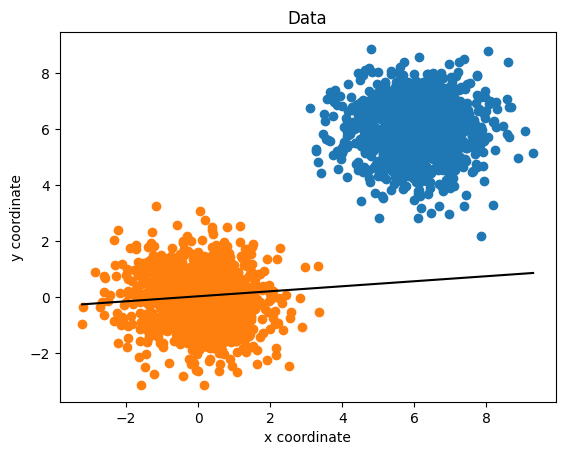

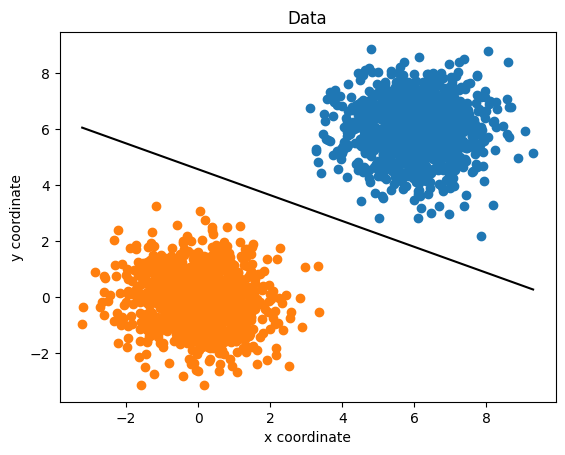

In [21]:
#Let us put points in data1 and data2 in a single array called data and attach labels to them
data = []
for i in range(len(data1)):
    data.append((data1[i],1))

for i in range(len(data2)):
    data.append((data2[i],-1))

#We will shuffle the data (Think why should we do this?)
random.shuffle(data)

#Train a perceptron on data, get the optimal w as w_star and the number of mistakes
w_star,mistakes=perceptron_training(data)




Print the number of mistakes and the optimal weights

In [22]:
#print the number of mistakes
print(mistakes)

#print the optimal w
print(w_star)


0
[ 0.50165433  1.08611758 -4.9575248 ]
